In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import sounddevice as sd

# Importe la fonction gamme du fichier gamme.py
from gamme import gamme

# Importe la fonction plot_filtered_signal du fichier utils.py
from utils import plot_filtered_signal, plot_filter_frequential_responses

In [30]:
# Fréquences d'échantillonnage et de tracé
duree = 12  # en secondes
fe = 1024*16  # Fréquence d'échantillonnage (Hz)
fmin = 250  # Fréquence minimale de tracé (Hz)
fmax = 800  # Fréquence maximale de tracé (Hz)
n = 1000  # Nombre de points de tracé

In [31]:
# Retourne le signal en fonction du temps
sig, t = gamme(duree, fe)

In [32]:
print(sd.query_devices())
sd.default.device = 1
print(sd.query_devices())

  0 vc4-hdmi-0: MAI PCM i2s-hifi-0 (hw:0,0), ALSA (0 in, 2 out)
* 1 bcm2835 Headphones: - (hw:2,0), ALSA (0 in, 8 out)
  2 sysdefault, ALSA (0 in, 128 out)
  3 hdmi, ALSA (0 in, 2 out)
  4 pulse, ALSA (32 in, 32 out)
  5 default, ALSA (32 in, 32 out)
  0 vc4-hdmi-0: MAI PCM i2s-hifi-0 (hw:0,0), ALSA (0 in, 2 out)
* 1 bcm2835 Headphones: - (hw:2,0), ALSA (0 in, 8 out)
  2 sysdefault, ALSA (0 in, 128 out)
  3 hdmi, ALSA (0 in, 2 out)
  4 pulse, ALSA (32 in, 32 out)
  5 default, ALSA (32 in, 32 out)


In [33]:
# Joue le signal audio
sd.play(sig, fe)
sd.wait()  # Attend la fin de la lecture

In [34]:
# Transformée de Fourier de notre signal + affichage spectre
S = np.fft.fft(sig) / fe
f = np.fft.fftfreq(sig.shape[0], d=1/fe)

In [35]:
# # Affiche le spectre du signal original
# plt.plot(f, np.abs(S))
# plt.xlim([fmin, fmax])
# plt.xlabel('Fréquence (Hz)')
# plt.ylabel('Amplitude')
# plt.show()

In [36]:
# Spécifications du filtre
Ap = 3     # Atténuation maximale en bande passante (dB)
Aa = 40    # Atténuation minimale en bande atténuée (dB)
fc = 420   # Fréquence de coupure (Hz)
df = 100   # Largeur de la bande de transition (Hz)

# Définition des fréquences atténuation et passante
fp = fc - df/2
fa = fc + df/2
# pour les pulsations respectives
wp = 2 * np.pi * fp
wa = 2 * np.pi * fa

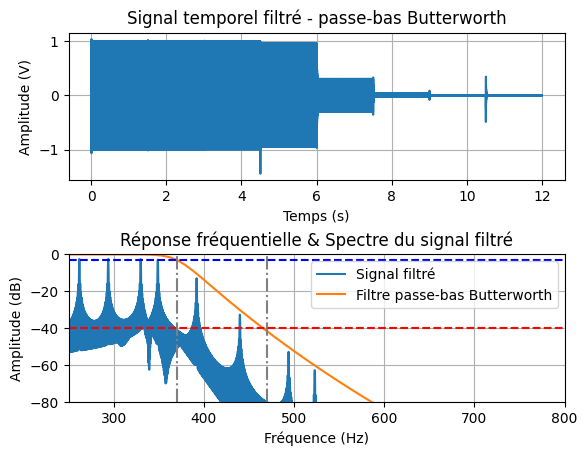

In [37]:
###################################################################
################### Filtre passe-bas Butterworth ##################
###################################################################
# Calcul de l'ordre et des coefficients du filtre de Butterworth
[n_Butterworth, wn_Butterworth] = signal.buttord(wp, wa, Ap, Aa, analog=True)
[Num_Butterworth, Deno_Butterworth] = signal.butter(n_Butterworth, wn_Butterworth, 'low', analog=True)

# Crée l'objet LTI à partir des coefficients du filtre
filtre_Butterworth = signal.lti(Num_Butterworth, Deno_Butterworth)

# Calcul de la réponse fréquentielle du filtre
w_Butterworth, H_Butterworth = signal.freqs(Num_Butterworth, Deno_Butterworth)

# Filtre le signal avec le filtre de Butterworth
sig_filtre_Butterworth = signal.lsim(filtre_Butterworth, sig, t)[1]

# Notre window pour les tracés
plot_filtered_signal(t=t, sig_filtre=sig_filtre_Butterworth, f=f, H=H_Butterworth, w_norm=w_Butterworth, fe=fe, fmin=fmin, fmax=fmax, Ap=Ap, Aa=Aa, fc=[fc], df=df, title='passe-bas Butterworth')

# Joue le signal audio filtré
sd.play(sig_filtre_Butterworth, fe)
sd.wait()  # Attend la fin de la lecture

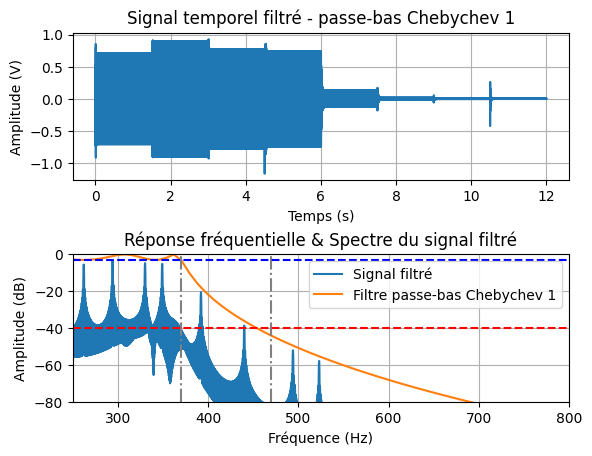

In [38]:
###################################################################
################### Filtre passe-bas Chebychev 1 ##################
###################################################################
# Calcul de l'ordre et des coefficients du filtre de Chebychev 1
[n_Chebychev1, wn_Chebychev1] = signal.cheb1ord(wp, wa, Ap, Aa, analog=True)
[Num_Chebychev1, Deno_Chebychev1] = signal.cheby1(n_Chebychev1, Ap, wn_Chebychev1, 'low', analog=True)

# Crée l'objet LTI à partir des coefficients du filtre
filtre_Chebychev1 = signal.lti(Num_Chebychev1, Deno_Chebychev1)

# Calcul de la réponse fréquentielle du filtre
w_Chebychev1, H_Chebychev1 = signal.freqs(Num_Chebychev1, Deno_Chebychev1)

# Filtre le signal avec le filtre de Chebychev 1
sig_filtre_Chebychev1 = signal.lsim(filtre_Chebychev1, sig, t)[1]

# Notre window pour les tracés
plot_filtered_signal(t=t, sig_filtre=sig_filtre_Chebychev1, f=f, H=H_Chebychev1, w_norm=w_Chebychev1, fe=fe, fmin=fmin, fmax=fmax, Ap=Ap, Aa=Aa, fc=[fc], df=df, title='passe-bas Chebychev 1')

# Joue le signal audio filtré
sd.play(sig_filtre_Chebychev1, fe)
sd.wait()  # Attend la fin de la lecture

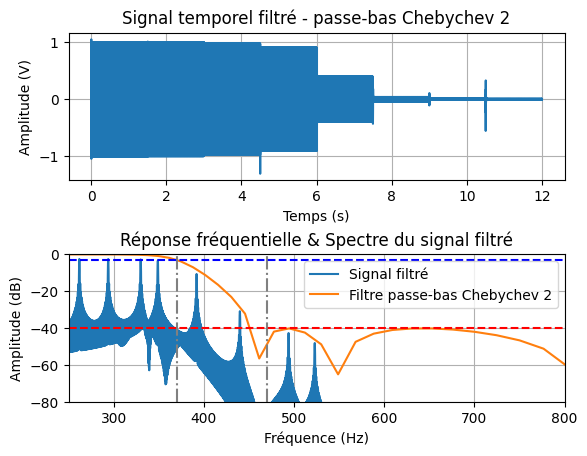

In [39]:
###################################################################
################### Filtre passe-bas Chebychev 2 ##################
###################################################################
# Calcul de l'ordre et des coefficients du filtre de Chebychev 2
[n_Chebychev2, wn_Chebychev2] = signal.cheb2ord(wp, wa, Ap, Aa, analog=True)
[Num_Chebychev2, Deno_Chebychev2] = signal.cheby2(n_Chebychev2, Aa, wn_Chebychev2, 'low', analog=True)

# Crée l'objet LTI à partir des coefficients du filtre
filtre_Chebychev2 = signal.lti(Num_Chebychev2, Deno_Chebychev2)

# Calcul de la réponse fréquentielle du filtre
w_Chebychev2, H_Chebychev2 = signal.freqs(Num_Chebychev2, Deno_Chebychev2)

# Filtre le signal avec le filtre de Chebychev 2
sig_filtre_Chebychev2 = signal.lsim(filtre_Chebychev2, sig, t)[1]

# Notre window pour les tracés
plot_filtered_signal(t=t, sig_filtre=sig_filtre_Chebychev2, f=f, H=H_Chebychev2, w_norm=w_Chebychev2, fe=fe, fmin=fmin, fmax=fmax, Ap=Ap, Aa=Aa, fc=[fc], df=df, title='passe-bas Chebychev 2')

# Joue le signal audio filtré
sd.play(sig_filtre_Chebychev2, fe)
sd.wait()  # Attend la fin de la lecture

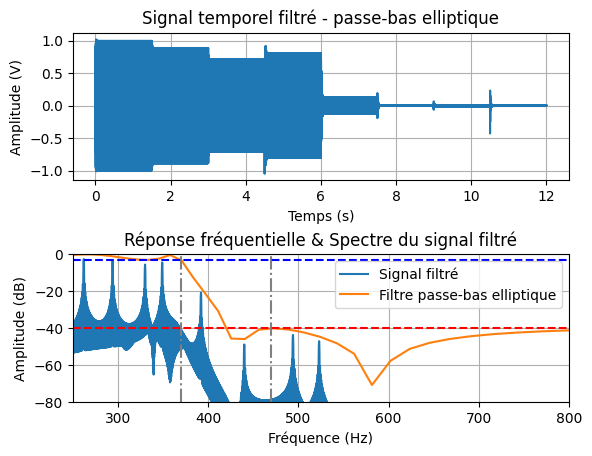

In [40]:
###################################################################
################### Filtre passe-bas elliptique ###################
###################################################################
# Calcul de l'ordre et des coefficients du filtre elliptique
[n_elliptique, wn_elliptique] = signal.ellipord(wp, wa, Ap, Aa, analog=True)
[Num_elliptique, Deno_elliptique] = signal.ellip(n_elliptique, Ap, Aa, wn_elliptique, 'low', analog=True)

# Crée l'objet LTI à partir des coefficients du filtre
filtre_elliptique = signal.lti(Num_elliptique, Deno_elliptique)

# Calcul de la réponse fréquentielle du filtre
w_elliptique, H_elliptique = signal.freqs(Num_elliptique, Deno_elliptique)

# Filtre le signal avec le filtre elliptique
sig_filtre_elliptique = signal.lsim(filtre_elliptique, sig, t)[1]

# Notre window pour les tracés
plot_filtered_signal(t=t, sig_filtre=sig_filtre_elliptique, f=f, H=H_elliptique, w_norm=w_elliptique, fe=fe, fmin=fmin, fmax=fmax, Ap=Ap, Aa=Aa, fc=[fc], df=df, title='passe-bas elliptique')

# Joue le signal audio filtré
sd.play(sig_filtre_elliptique, fe)
sd.wait()  # Attend la fin de la lecture

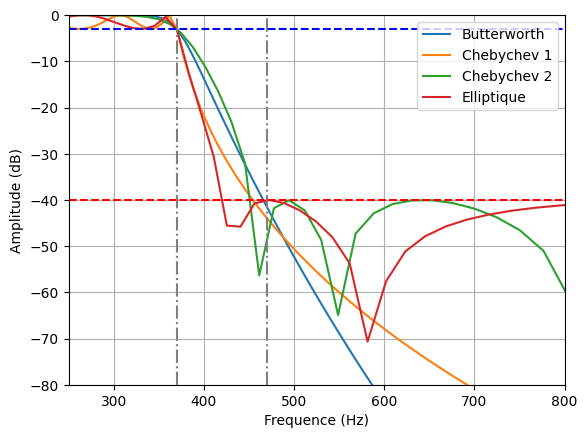

In [41]:
###################################################################
################### Affichage des réponses fréquentielles #########
###################################################################

# Affiche les réponses fréquentielles des filtres
plot_filter_frequential_responses([(w_Butterworth, H_Butterworth, 'Butterworth'), (w_Chebychev1, H_Chebychev1, 'Chebychev 1'), (w_Chebychev2, H_Chebychev2, 'Chebychev 2'), (w_elliptique, H_elliptique, 'Elliptique')], fmin, fmax, Ap, Aa, [fc], df)